In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('portfolio_data.csv')
df


,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [3]:
df['Date'] = df['Date'].str.replace('/', '-')

In [4]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5-1-2013,248.229996,51.190983,106.250000,30.415714
1,5-2-2013,252.550003,51.987320,98.099998,30.641428
2,5-3-2013,258.049988,52.446388,112.900002,30.492857
3,5-6-2013,255.720001,53.205257,109.599998,30.098572
4,5-7-2013,257.730011,54.151505,113.199997,29.464285


In [5]:
df=df.dropna()

<Axes: >

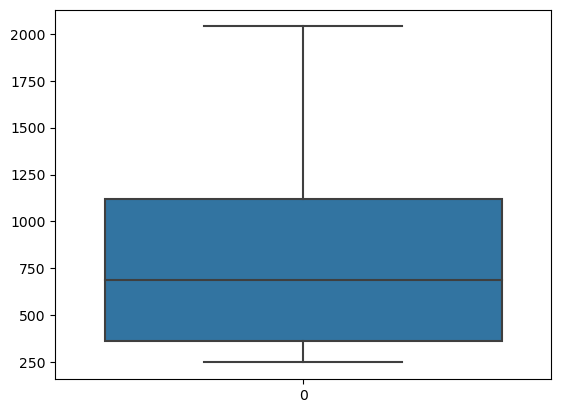

In [6]:
sns.boxplot(df["AMZN"])

<Axes: >

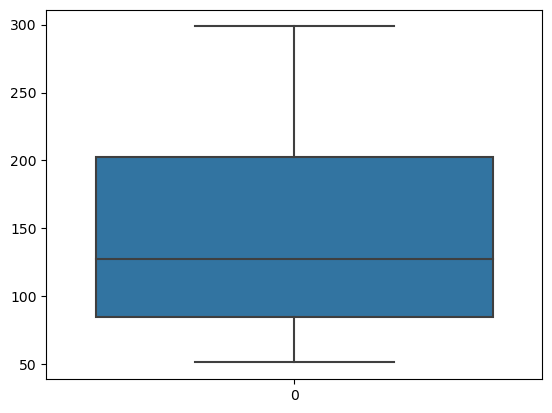

In [7]:
sns.boxplot(df["DPZ"])

<Axes: >

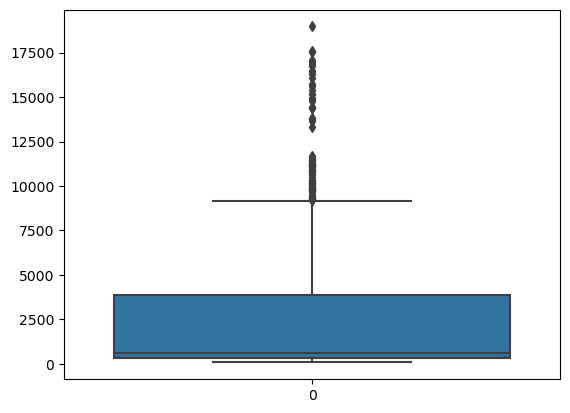

In [8]:
sns.boxplot(df["BTC"])

<Axes: >

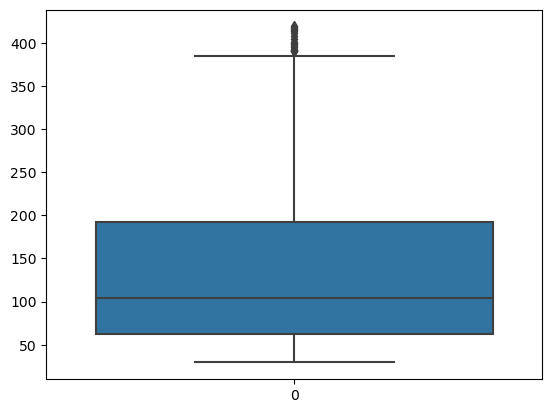

In [9]:
sns.boxplot(df["NFLX"])

we found the outliers only in just BTC and NTFX (we will try just cap them)

C:\Users\rizwa\AppData\Local\Temp\ipykernel_15320\3710496182.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AMZN'])
C:\Users\rizwa\AppData\Local\Temp\ipykernel_15320\3710496182.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DPZ'])
C:\Users\rizwa\AppData\Local\Temp\ipykernel_153

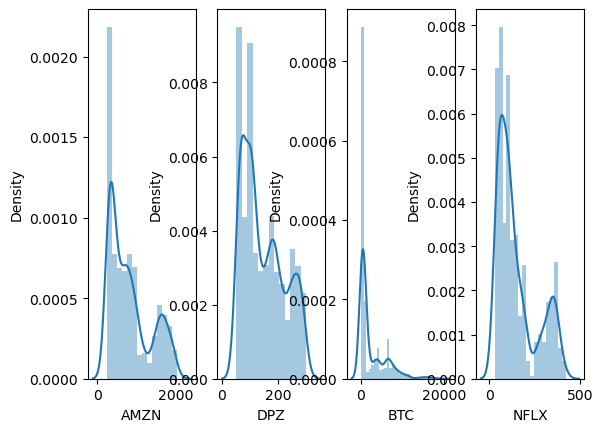

In [10]:
plt.subplot(1,4,1)
sns.distplot(df['AMZN'])
plt.subplot(1,4,2)
sns.distplot(df['DPZ'])
plt.subplot(1,4,3)
sns.distplot(df['BTC'])
plt.subplot(1,4,4)
sns.distplot(df['NFLX'])
plt.show()

I am using Percentile method to find and cap the outliers

In [11]:
df["BTC"].describe()

count     1520.000000
mean      2421.465669
std       3310.894199
min         69.660004
25%        340.904999
50%        625.304993
75%       3874.912415
max      18972.320310
Name: BTC, dtype: float64

In [12]:
max_limit = df["BTC"].quantile(0.10)
min_limit = df["BTC"].quantile(0.90)
max_limit


224.9470014

In [13]:
min_limit

7131.842871300003

In [14]:
new_data2 = df.copy()
new_data2["BTC"] = np.where(df["BTC"]>max_limit,max_limit, np.where(df["BTC"]<min_limit,min_limit, df["BTC"]))

same for NFLX

In [15]:
df["NFLX"].describe()

count    1520.000000
mean      147.668273
std       107.641486
min        29.464285
25%        62.851071
50%       104.000000
75%       192.207496
max       418.970001
Name: NFLX, dtype: float64

In [16]:
max_limit = df["NFLX"].quantile(0.10)
min_limit = df["NFLX"].quantile(0.90)

In [17]:
new_data2 = new_data2.copy()
new_data2["NFLX"] = np.where(df["NFLX"]>max_limit,max_limit, np.where(df["NFLX"]<min_limit,min_limit, df["NFLX"]))

In [18]:
new_data2['Date'] = pd.to_datetime(new_data2['Date'])

max no of outier were been removed and capped

create ml model for AMZN

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('portfolio_data.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical features from the datetime column
df['DayOfYear'] = df['Date'].dt.dayofyear
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Prepare features (X) and target variable (y)
X = df[['DayOfYear', 'DayOfWeek', 'DPZ', 'BTC', 'NFLX']]  # Features
y = df['AMZN']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Prepare input data for prediction
new_date = pd.to_datetime('2020-05-01')  # Convert the date to datetime format
new_day_of_year = new_date.dayofyear
new_day_of_week = new_date.dayofweek

# Create a DataFrame for prediction
new_data = pd.DataFrame({'DayOfYear': [new_day_of_year], 'DayOfWeek': [new_day_of_week], 'DPZ': [0], 'BTC': [0], 'NFLX': [0]})

# Use the trained model to make predictions
predicted_price = regressor.predict(new_data)

print("Predicted AMZN price for 2020-05-01:", predicted_price[0])


Predicted AMZN price for 2020-05-01: 252.5701992199999


In [24]:
new_date = pd.to_datetime('2023-05-10')  # Convert the date to datetime format
new_day_of_year = new_date.dayofyear
new_day_of_week = new_date.dayofweek

# Create a DataFrame for prediction
new_data = pd.DataFrame({'DayOfYear': [new_day_of_year], 'DayOfWeek': [new_day_of_week], 'DPZ': [0], 'BTC': [0], 'NFLX': [0]})

# Use the trained model to make predictions
predicted_price = regressor.predict(new_data)

print("Predicted AMZN price for 2023-05-10:", predicted_price[0])

Predicted AMZN price for 2023-05-10: 259.8822022800001
